Siin notebookis viime läbi andmetöötluse, mille tulemusi kavatseme kasutada artiklis.

In [1]:
import src.slmcalib2 as sc2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {"weight" : "normal",
        "size"   : 20}

plt.rc("font", **font)
plt.rc("axes", linewidth=2)

In [3]:
loc = {"start_x":318, "start_y":162, "end_x":1627, "end_y":1902, "memmap":"datarr_article_raw"}
ANALYSER = sc2.DataAnalysis("", **loc)

In [4]:
old_phases = ANALYSER.get_phase_boxes(32)

In [ ]:
CALIB = sc2.Calibration(ANALYSER, 32, stdev=1)

In [ ]:
pi_grid = CALIB.phase_grid_mask(np.pi)

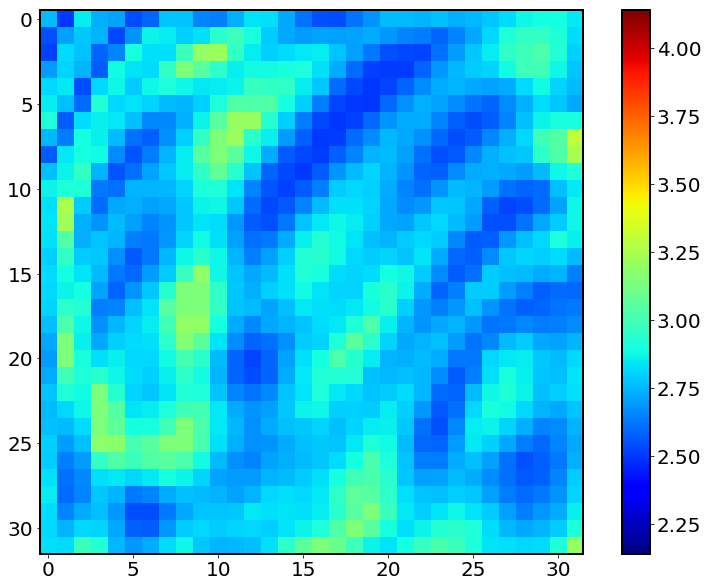

In [5]:
plt.figure(figsize=(14, 10))
plt.imshow(old_phases[:, :, 103], cmap="jet")
plt.clim(2.14, 4.14)
plt.colorbar()
plt.show()

In [ ]:
pi_plane = np.full((768, 1024), np.pi)

plt.figure(figsize=(14, 10))
plt.imshow(CALIB.calib_interp(pi_plane), cmap="jet")
plt.colorbar()
plt.show()

In [ ]:
pi_interp = CALIB.calib_interp(pi_grid)
pi_poly3d = CALIB.calib_poly3d(pi_grid)
pi_boxing = CALIB.calib_boxing(pi_grid)

In [ ]:
print("interp")
%timeit CALIB.calib_interp(pi_grid)
print("poly3d")
%timeit CALIB.calib_poly3d(pi_grid)
print("boxing")
%timeit CALIB.calib_boxing(pi_grid)

In [ ]:
plt.figure(figsize=(14,10))
plt.imshow(pi_interp, cmap="jet")
plt.colorbar()
plt.show()

In [ ]:
# np.save("../article_poly3d.npy", CALIB.generate_phasecalib_array(CALIB.calib_poly3d))
# np.save("../article_interp.npy", CALIB.generate_phasecalib_array(CALIB.calib_interp))
# np.save("../article_boxing.npy", CALIB.generate_phasecalib_array(CALIB.calib_boxing))
# np.save("../article_linear.npy", CALIB.generate_phasecalib_array(CALIB.calib_linear))
# np.save("../article_glut.npy",   CALIB.generate_phasecalib_array(CALIB.calib_glut))

In [ ]:
location = {"start_x":318, "start_y":162, "end_x":1627, "end_y":1902}

# rms_errors = [sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_linear/",  **location).get_phase_boxes(64)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_glut/", **location).get_phase_boxes(64)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_poly3d/",  **location).get_phase_boxes(64)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_boxing/",  **location).get_phase_boxes(64)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_interp/", **location).get_phase_boxes(64))]


In [ ]:
plt.figure(figsize=(14, 10))

x_axis = np.arange(5)
x_ticks = ["linear", "glut", "poly3d", "boxing", "interp"]

plt.xticks(x_axis, x_ticks)
plt.scatter(x_axis, rms_errors, s=100, color="blue")
plt.xlabel("Calibration method")
plt.ylabel("RMS error (rad)")
plt.title("RMS error comparison for calibration methods")
plt.legend()
plt.grid()
plt.show()

In [ ]:
together = zip(x_ticks, rms_errors)
sorted(together, key = lambda t: t[1])

In [7]:
location = {"start_x":318, "start_y":162, "end_x":1627, "end_y":1902}

# rms_errors = [sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_linear/",  **location).get_phase_boxes(32)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_glut/", **location).get_phase_boxes(32)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_poly3d/",  **location).get_phase_boxes(32)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_boxing/",  **location).get_phase_boxes(32)),
#               sc2.get_rms_error(sc2.DataAnalysis("../2018-07-11/article_interp/", **location).get_phase_boxes(32))]


In [10]:
second_analysis = sc2.DataAnalysis("../2018-07-11/article_interp/",  **location)
new_boxes = second_analysis.get_phase_boxes(32)

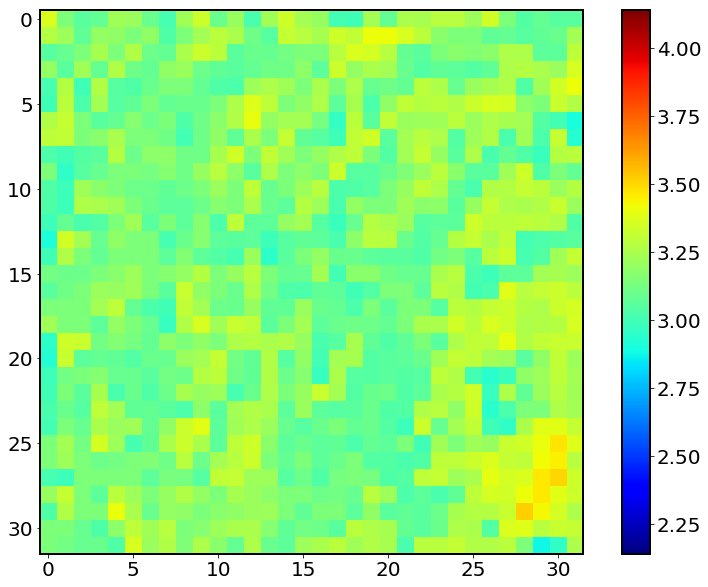

In [11]:
plt.figure(figsize=(14, 10))
plt.imshow(new_boxes[:, :, 103], cmap="jet")
plt.colorbar()
plt.clim(2.14, 4.14)
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))

x_axis = np.arange(5)
x_ticks = ["linear", "glut", "poly3d", "boxing", "interp"]

plt.xticks(x_axis, x_ticks)
plt.scatter(x_axis, rms_errors, s=100, color="blue")
plt.xlabel("Calibration method")
plt.ylabel("RMS error (rad)")
plt.title("RMS error comparison for calibration methods")
plt.legend()
plt.grid()
plt.show()

In [ ]:
together = zip(x_ticks, rms_errors)
sorted(together, key = lambda t: t[1])

In [ ]:
import cv2
from holo.gs import gerchberg_saxton

def quarter_img(filename):
    input_img = cv2.imread(filename, 0).astype(np.uint8)
    smaller = np.zeros((768, 1024), dtype=np.uint8)
    smaller[0:384,0:512] = cv2.resize(input_img, (512, 384))
    
    return smaller

In [ ]:
flower_src = quarter_img("./holo/lill.jpg")
tiger_src = quarter_img("./holo/tiger.jpg")

flower = gerchberg_saxton(flower_src, iterations=20)
tiger = gerchberg_saxton(tiger_src, iterations=20)

In [ ]:
cv2.imshow("", CALIB.calib_interp(tiger)), cv2.waitKey(0)

In [ ]:
holo_arrs = []

holo_arrs.append(CALIB.calib_linear(flower))
holo_arrs.append(  CALIB.calib_glut(flower))
holo_arrs.append(CALIB.calib_poly3d(flower))
holo_arrs.append(CALIB.calib_boxing(flower))
holo_arrs.append(CALIB.calib_interp(flower))

holo_arrs.append(CALIB.calib_linear(tiger))
holo_arrs.append(  CALIB.calib_glut(tiger))
holo_arrs.append(CALIB.calib_poly3d(tiger))
holo_arrs.append(CALIB.calib_boxing(tiger))
holo_arrs.append(CALIB.calib_interp(tiger))

np.save("holo_arrs.npy", np.array(holo_arrs))

In [ ]:
intensity = cv2.imread("../2018-07-11/article_interp/img_102_.tiff", -1)[loc["start_x"]:loc["end_x"], loc["start_y"]:loc["end_y"]]

smoothed = cv2.GaussianBlur(intensity, (155,155), 0)
smoothed = cv2.resize(smoothed, (1024, 768))
smoothed = smoothed/np.max(smoothed)

In [ ]:
flower_i = gerchberg_saxton(flower_src, iterations=20, illumination=smoothed)
tiger_i = gerchberg_saxton(tiger_src, iterations=20, illumination=smoothed)

In [ ]:
cv2.imshow("", CALIB.calib_interp(tiger)), cv2.waitKey(0)

In [ ]:
np.save("flower_i.npy", CALIB.calib_interp(flower_i))
np.save("tiger_i.npy", CALIB.calib_interp(tiger_i))